In [1]:
import os
import random
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import pickle5 as pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D, Flatten, Conv2D

In [2]:
with open("images_train/img_train.pkl", "rb") as fh:
        data = pickle.load(fh)
X_train_ = pd.DataFrame(data)["img_array"] 

with open("images_train/img_test.pkl", "rb") as fh:
    data = pickle.load(fh)
X_test_ = pd.DataFrame(data)["img_array"]

with open("images_train/img_y_train.pkl", "rb") as fh:
    data = pickle.load(fh)
y_train = np.array(pd.DataFrame(data)["label"].values.astype(np.float32)).flatten()

with open("images_train/img_y_test.pkl", "rb") as fh:
    data = pickle.load(fh)
y_test = np.array(pd.DataFrame(data)["label"].values.astype(np.float32)).flatten()

In [3]:
def train():
    y_test[y_test == 2] = -1
    y_test[y_test == 1] = 2
    y_test[y_test == -1] = 1

    y_train[y_train == 2] = -1
    y_train[y_train == 1] = 2
    y_train[y_train == -1] = 1


    X_train = []
    X_test = []

    for i in range(len(X_train_)):
        X_train.append(X_train_.values[i])
        
    for i in range(len(X_test_)):
        X_test.append(X_test_.values[i])


    X_train = np.array(X_train)
    X_test = np.array(X_test)


    # (3909, 1, 72, 72, 3) //original shape
    X_train= X_train.reshape(-1,72,72,3)
    #modified shape (3909,72, 72, 3)

    # (205, 1, 72, 72, 3) //original shape
    X_test= X_test.reshape(-1,72,72,3)
    #modified shape (205,72, 72, 3)

    model = Sequential()
    model.add(Conv2D(100, (3, 3),  activation='relu', input_shape=(72, 72, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(50, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(3, activation = "softmax"))


    model.compile(Adam(learning_rate = 0.001), "sparse_categorical_crossentropy", metrics = ["sparse_categorical_accuracy"])

    model.summary()
    history = model.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.1, verbose=1) 
    model.save("./saved_models/train_images_model_base.hdf5")


    plt.clf()
    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    plt.clf()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    plt.clf()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 70, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 100)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 35, 35, 100)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 33, 50)        45050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 50)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 50)        0

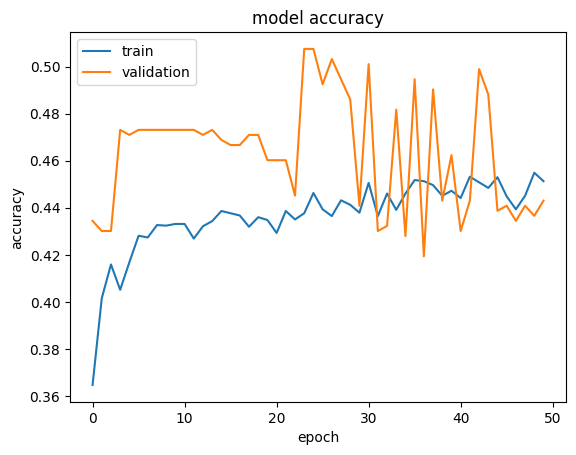

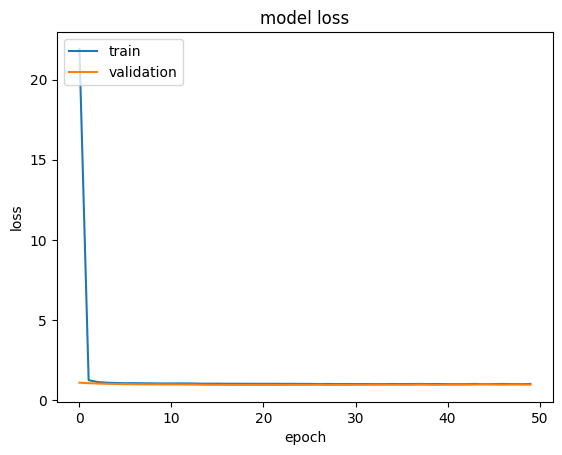

<Figure size 640x480 with 0 Axes>

In [4]:
train()